In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = 'influensa.csv'
df = pd.read_csv(file_path, sep=';')

In [4]:
df['Datum'] = pd.to_datetime(df['Datum'])
df['DATA'] = pd.to_numeric(df['DATA'], errors='coerce')

In [5]:
print("✅ Data after loading and cleaning:")
print(df.head())

✅ Data after loading and cleaning:
       Datum      Vårdform         Mått  DATA
0 2015-07-09    Slutenvård        Antal   0.0
1 2015-07-09    Slutenvård  Per 100 000   0.0
2 2015-07-09  Intensivvård        Antal   0.0
3 2015-07-09  Intensivvård  Per 100 000   0.0
4 2015-07-16    Slutenvård        Antal   0.0


In [6]:
df['YearMonth'] = df['Datum'].dt.strftime('%Y-%m')

In [7]:
print("\n✅ Data after formatting date (added 'YearMonth'):")
print(df[['Datum', 'YearMonth', 'Vårdform', 'Mått', 'DATA']].head())


✅ Data after formatting date (added 'YearMonth'):
       Datum YearMonth      Vårdform         Mått  DATA
0 2015-07-09   2015-07    Slutenvård        Antal   0.0
1 2015-07-09   2015-07    Slutenvård  Per 100 000   0.0
2 2015-07-09   2015-07  Intensivvård        Antal   0.0
3 2015-07-09   2015-07  Intensivvård  Per 100 000   0.0
4 2015-07-16   2015-07    Slutenvård        Antal   0.0


 A. Slutenvård - Antal
 

In [8]:
slutenvard_antal = df[(df['Vårdform'] == 'Slutenvård') & (df['Mått'] == 'Antal')]
print("\n✅ Data after filtering (Slutenvård - Antal):")
print(slutenvard_antal.head())


✅ Data after filtering (Slutenvård - Antal):
        Datum    Vårdform   Mått  DATA YearMonth
0  2015-07-09  Slutenvård  Antal   0.0   2015-07
4  2015-07-16  Slutenvård  Antal   0.0   2015-07
8  2015-07-23  Slutenvård  Antal   0.6   2015-07
12 2015-07-30  Slutenvård  Antal   0.6   2015-07
16 2015-08-06  Slutenvård  Antal   0.0   2015-08


#  Intensivvård - Antal

In [9]:
intensivvard_antal = df[(df['Vårdform'] == 'Intensivvård') & (df['Mått'] == 'Antal')]
print("\n✅ Data after filtering (Intensivvård - Antal):")
print(intensivvard_antal.head())


✅ Data after filtering (Intensivvård - Antal):
        Datum      Vårdform   Mått  DATA YearMonth
2  2015-07-09  Intensivvård  Antal   0.0   2015-07
6  2015-07-16  Intensivvård  Antal   0.0   2015-07
10 2015-07-23  Intensivvård  Antal   0.0   2015-07
14 2015-07-30  Intensivvård  Antal   0.0   2015-07
18 2015-08-06  Intensivvård  Antal   0.0   2015-08


# Slutenvård - Per 100 000

In [10]:
slutenvard_per100k = df[(df['Vårdform'] == 'Slutenvård') & (df['Mått'] == 'Per 100 000')]
print("\n✅ Data after filtering (Slutenvård - Per 100 000):")
print(slutenvard_per100k.head())


✅ Data after filtering (Slutenvård - Per 100 000):
        Datum    Vårdform         Mått   DATA YearMonth
1  2015-07-09  Slutenvård  Per 100 000  0.000   2015-07
5  2015-07-16  Slutenvård  Per 100 000  0.000   2015-07
9  2015-07-23  Slutenvård  Per 100 000  0.008   2015-07
13 2015-07-30  Slutenvård  Per 100 000  0.008   2015-07
17 2015-08-06  Slutenvård  Per 100 000  0.000   2015-08


# Plotting graphs

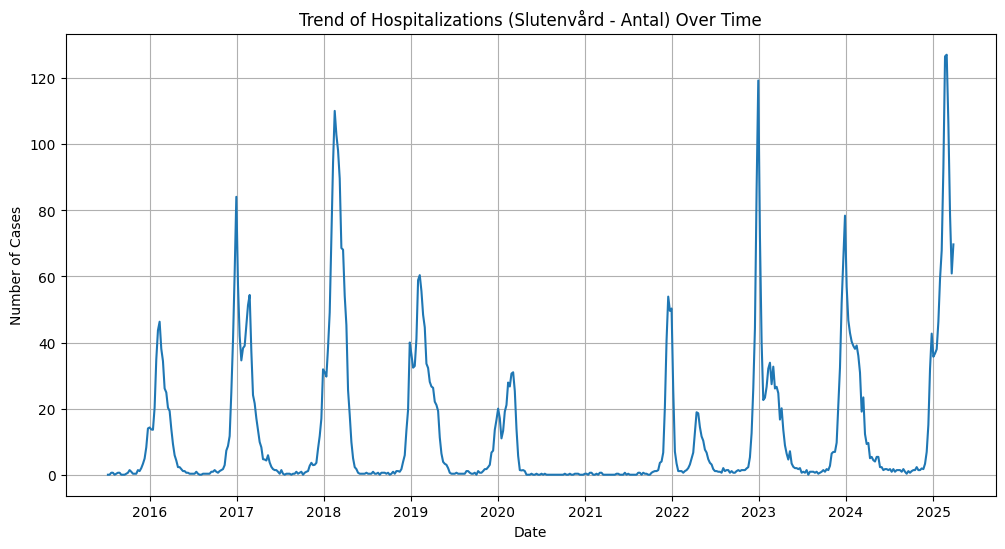

In [11]:
# 📈 A. Line chart - Slutenvård Antal over time
plt.figure(figsize=(12, 6))
plt.plot(slutenvard_antal['Datum'], slutenvard_antal['DATA'])
plt.title('Trend of Hospitalizations (Slutenvård - Antal) Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()


✅ Table of average hospitalizations per month:
YearMonth
2015-07    0.300
2015-08    0.375
2015-09    0.075
2015-10    0.700
2015-11    1.200
Name: DATA, dtype: float64


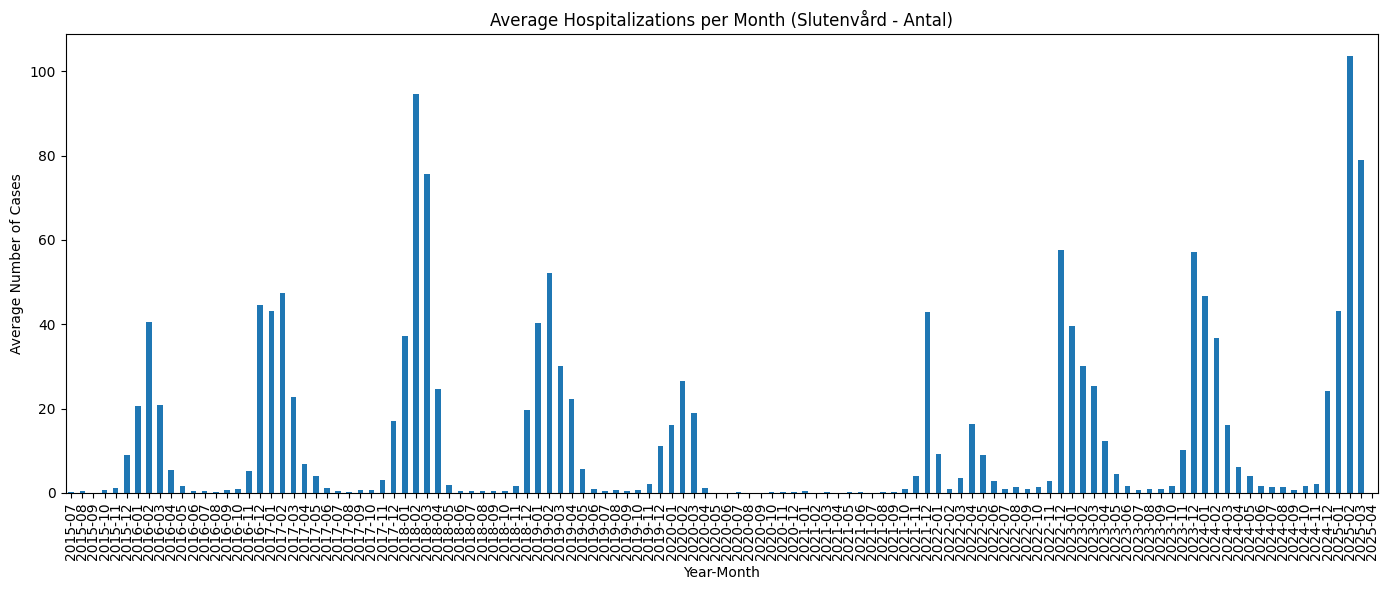

In [12]:
# 📊 B. Bar chart - Average number per month
monthly_avg = slutenvard_antal.groupby('YearMonth')['DATA'].mean()

print("\n✅ Table of average hospitalizations per month:")
print(monthly_avg.head())

plt.figure(figsize=(14, 6))
monthly_avg.plot(kind='bar')
plt.title('Average Hospitalizations per Month (Slutenvård - Antal)')
plt.xlabel('Year-Month')
plt.ylabel('Average Number of Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



✅ Table of average hospitalizations per year:
Year
2015     2.157692
2016    12.167308
2017    11.882692
2018    21.365385
2019    13.730769
Name: DATA, dtype: float64


/var/folders/fb/hz_k_xnn34d2ls84v7yjvnzr0000gn/T/ipykernel_9253/3233864721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slutenvard_antal['Year'] = slutenvard_antal['Datum'].dt.year


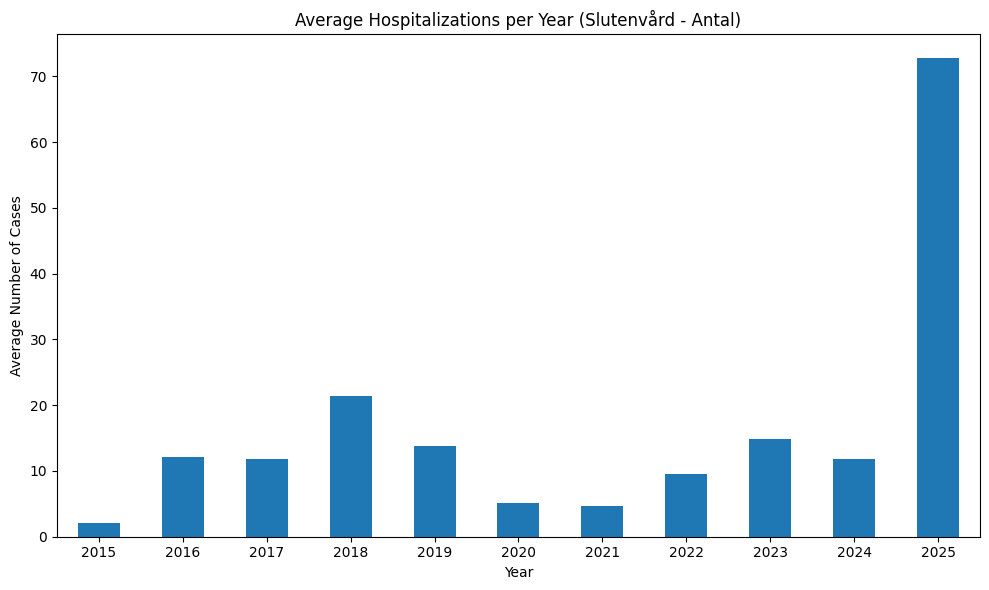

In [13]:
# Add a 'Year' column if it's not already there
slutenvard_antal['Year'] = slutenvard_antal['Datum'].dt.year

# Group by Year and calculate the mean
yearly_avg = slutenvard_antal.groupby('Year')['DATA'].mean()

print("\n✅ Table of average hospitalizations per year:")
print(yearly_avg.head())

# Plot
plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar')
plt.title('Average Hospitalizations per Year (Slutenvård - Antal)')
plt.xlabel('Year')
plt.ylabel('Average Number of Cases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()